# Long-Short Trading Strategy on a Stock Basket from March 2008 to March 2023

In [2]:
import warnings
# To ignore warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
pip install yfinance

## Cleaning All the Data

In [6]:
# Load the data 
file_path = 'DATA.xlsx'
# Load the sheets by their names
returns = pd.read_excel(file_path, sheet_name="RETURNS")
price_book = pd.read_excel(file_path, sheet_name="PRICE TO BOOK")
benchmark_returns= pd.read_excel(file_path, sheet_name="BENCHMARK RETURNS")

### Returns

In [8]:
returns.dtypes

Unnamed: 0                      datetime64[ns]
ANHEUSER-BUSCH INBEV SA/NV             float64
KONINKLIJKE AHOLD DELHAIZE N           float64
ADIDAS AG                              float64
AIR LIQUIDE SA                         float64
AIRBUS SE                              float64
ALLIANZ SE-REG                         float64
ASML HOLDING NV                        float64
BASF SE                                float64
BAYER AG-REG                           float64
BANCO BILBAO VIZCAYA ARGENTA           float64
BAYERISCHE MOTOREN WERKE AG            float64
DANONE                                 float64
BNP PARIBAS                            float64
CRH PLC                                float64
AXA SA                                 float64
DEUTSCHE BOERSE AG                     float64
VINCI SA                               float64
DEUTSCHE POST AG-REG                   float64
DEUTSCHE TELEKOM AG-REG                float64
ESSILORLUXOTTICA                       float64
ENEL SPA     

In [9]:
# Count the number of missing values
returns_nan_count = returns.isnull().sum()
returns_nan_count

Unnamed: 0                      0
ANHEUSER-BUSCH INBEV SA/NV      0
KONINKLIJKE AHOLD DELHAIZE N    0
ADIDAS AG                       0
AIR LIQUIDE SA                  0
AIRBUS SE                       0
ALLIANZ SE-REG                  0
ASML HOLDING NV                 0
BASF SE                         0
BAYER AG-REG                    0
BANCO BILBAO VIZCAYA ARGENTA    0
BAYERISCHE MOTOREN WERKE AG     0
DANONE                          0
BNP PARIBAS                     0
CRH PLC                         0
AXA SA                          0
DEUTSCHE BOERSE AG              0
VINCI SA                        0
DEUTSCHE POST AG-REG            0
DEUTSCHE TELEKOM AG-REG         0
ESSILORLUXOTTICA                0
ENEL SPA                        0
ENGIE                           0
ENI SPA                         0
FRESENIUS SE & CO KGAA          0
SOCIETE GENERALE SA             0
IBERDROLA SA                    0
ING GROEP NV                    0
INTESA SANPAOLO                 0
INDUSTRIA DE D

In [10]:
# Rename the column 'Unnamed: 0' to 'Date'
returns.rename(columns = {"Unnamed: 0" : "Date"}, inplace = True)

In [11]:
returns

,Date,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
0,2006-01-31,0.054383,0.003162,0.075629,0.041231,0.010972,0.036812,0.097633,0.002335,-0.026051,...,0.076236,0.019595,0.061884,0.100177,0.055098,0.141340,-0.011803,0.070689,-0.025699,0.091075
1,2006-02-28,0.000543,0.077163,-0.046946,-0.021275,-0.046203,0.020732,-0.061456,-0.024685,-0.016879,...,-0.017479,-0.053677,0.042739,0.015130,0.025850,-0.002907,0.030260,-0.071304,-0.012797,0.219389
2,2006-03-31,-0.002326,-0.051172,-0.005057,0.037439,0.130364,0.017577,-0.032165,0.022768,-0.021617,...,-0.020598,0.099439,-0.016324,0.046520,0.000520,0.039068,0.000768,0.031755,0.113553,0.047422
3,2006-04-28,0.045571,0.009242,0.025480,-0.001745,-0.100372,-0.036871,-0.002967,0.050386,0.107398,...,-0.027246,-0.047770,0.019916,-0.032454,-0.026485,0.007295,-0.019305,0.006891,0.021172,-0.028490
4,2006-05-31,-0.061532,-0.025948,-0.067838,-0.032199,-0.092904,-0.071193,-0.060119,-0.038437,-0.017612,...,-0.137736,-0.016054,-0.072645,-0.045965,-0.105059,-0.075689,0.025819,-0.048478,0.002404,-0.081681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2022-11-30,0.107701,-0.015399,0.235201,0.044747,-0.003468,0.121571,0.177395,0.067790,0.040584,...,0.041696,-0.009733,0.087152,0.069517,0.186008,0.083113,0.028695,0.094555,0.035731,0.081642
203,2022-12-30,0.003927,-0.035053,0.042533,-0.042107,0.016666,-0.016884,-0.102120,-0.043803,-0.127391,...,-0.004259,0.038853,-0.016846,-0.077254,-0.012039,-0.059027,-0.012773,-0.010676,0.038931,-0.037803
204,2023-01-31,-0.020969,0.020306,0.156283,0.103172,0.034409,0.091091,0.196108,0.129551,0.179513,...,0.127267,-0.001893,0.142915,0.124387,0.102283,0.134639,0.030141,-0.017305,0.105901,0.090363
205,2023-02-28,0.038840,0.096037,-0.038809,0.030809,0.079937,0.013457,-0.028726,-0.074903,-0.012453,...,0.016388,-0.008699,0.162194,-0.008300,0.042125,0.025620,0.103810,0.027904,-0.011161,0.017489


### Price to book

In [13]:
# Count the number of missing values
price_book_nan_count = price_book.isnull().sum()
price_book_nan_count

Unnamed: 0                       0
ANHEUSER-BUSCH INBEV SA/NV       0
KONINKLIJKE AHOLD DELHAIZE N     0
ADIDAS AG                        0
AIR LIQUIDE SA                   0
AIRBUS SE                        0
ALLIANZ SE-REG                   0
ASML HOLDING NV                  0
BASF SE                          0
BAYER AG-REG                     0
BANCO BILBAO VIZCAYA ARGENTA     0
BAYERISCHE MOTOREN WERKE AG      0
DANONE                           0
BNP PARIBAS                     24
CRH PLC                          0
AXA SA                           0
DEUTSCHE BOERSE AG               0
VINCI SA                         0
DEUTSCHE POST AG-REG             0
DEUTSCHE TELEKOM AG-REG          0
ESSILORLUXOTTICA                 0
ENEL SPA                         0
ENGIE                            0
ENI SPA                          0
FRESENIUS SE & CO KGAA           0
SOCIETE GENERALE SA             18
IBERDROLA SA                     0
ING GROEP NV                     0
INTESA SANPAOLO     

In [14]:
# Fill missing values  in the 'price_book' DataFrame with the mean of each column
price_book.fillna(price_book.mean(), inplace=True)
price_book_nan_count = price_book.isnull().sum()
price_book_nan_count

Unnamed: 0                      0
ANHEUSER-BUSCH INBEV SA/NV      0
KONINKLIJKE AHOLD DELHAIZE N    0
ADIDAS AG                       0
AIR LIQUIDE SA                  0
AIRBUS SE                       0
ALLIANZ SE-REG                  0
ASML HOLDING NV                 0
BASF SE                         0
BAYER AG-REG                    0
BANCO BILBAO VIZCAYA ARGENTA    0
BAYERISCHE MOTOREN WERKE AG     0
DANONE                          0
BNP PARIBAS                     0
CRH PLC                         0
AXA SA                          0
DEUTSCHE BOERSE AG              0
VINCI SA                        0
DEUTSCHE POST AG-REG            0
DEUTSCHE TELEKOM AG-REG         0
ESSILORLUXOTTICA                0
ENEL SPA                        0
ENGIE                           0
ENI SPA                         0
FRESENIUS SE & CO KGAA          0
SOCIETE GENERALE SA             0
IBERDROLA SA                    0
ING GROEP NV                    0
INTESA SANPAOLO                 0
INDUSTRIA DE D

In [15]:
# Rename the column 'Unnamed: 0' to 'Date'
price_book.rename(columns={"Unnamed: 0" : "Date"}, inplace = True)
print(price_book.head())

        Date  ANHEUSER-BUSCH INBEV SA/NV  KONINKLIJKE AHOLD DELHAIZE N  \
0 2006-01-31                      1.9489                        2.6765   
1 2006-02-28                      2.1140                        2.6849   
2 2006-03-31                      2.0716                        2.8921   
3 2006-04-28                      2.1043                        2.1745   
4 2006-05-31                      2.2616                        2.1946   

   ADIDAS AG  AIR LIQUIDE SA  AIRBUS SE  ALLIANZ SE-REG  ASML HOLDING NV  \
0     3.0258          2.9867     1.9480          1.3132           4.7849   
1     3.2546          3.1099     1.9693          1.3615           5.2520   
2     3.1018          3.0437     1.8784          1.3898           4.9293   
3     2.9895          3.1576     1.9171          1.3497           4.5361   
4     3.0657          3.1521     1.7247          1.2999           4.5226   

   BASF SE  BAYER AG-REG  ...  SAFRAN SA  SANOFI  BANCO SANTANDER SA  SAP SE  \
0   1.9532        

### Benchmark returns

In [17]:
# Count the number of missing values
benchmark_returns_nan_count = benchmark_returns.isnull().sum()
benchmark_returns_nan_count

Unnamed: 0           0
ESTX 50 (EUR) NRt    0
dtype: int64

In [18]:
# Rename the column 'Unnamed: 0' to 'Date'
benchmark_returns.rename(columns = {"Unnamed: 0" : "Date"},inplace = True)
print(benchmark_returns.head())

        Date  ESTX 50 (EUR) NRt
0 2006-01-31           0.032523
1 2006-02-28           0.022783
2 2006-03-31           0.021922
3 2006-04-28          -0.001103
4 2006-05-31          -0.042522


In [19]:
benchmark_returns = benchmark_returns[26:len(benchmark_returns)]
benchmark_returns

,Date,ESTX 50 (EUR) NRt
26,2008-03-31,-0.025483
27,2008-04-30,0.060791
28,2008-05-30,0.004366
29,2008-06-30,-0.111419
30,2008-07-31,0.005236
...,...,...
202,2022-11-30,0.096987
203,2022-12-30,-0.042659
204,2023-01-31,0.098847
205,2023-02-28,0.019017


## Calculation of scores


In [21]:
returns["Date"] = pd.to_datetime(returns["Date"])
price_book["Date"] = pd.to_datetime(price_book["Date"])
benchmark_returns["Date"] = pd.to_datetime(benchmark_returns["Date"])

### Momentum Score

- The momentum score measures a stock's relative performance compared to a group of stocks by considering both its average returns and its volatility. A high score indicates that the stock has shown strong performance relative to its peers, with low relative volatility, suggesting a stable trend. A low score, on the other hand, indicates poorer performance or higher instability.

In [24]:
# List to store momentum scores
momentum_scores = []

for i in range(26, len(returns)):
    # Window of the last 12 months
    last_twelve_months_returns = returns.iloc[i-12:i, :]

    # Drop missing values and select numerical columns
    last_twelve_months_returns = last_twelve_months_returns.dropna(axis=1).select_dtypes(include=[np.number])

    # Calculate mean and standardize
    # Mean of each stock's return
    mean_return = last_twelve_months_returns.mean(axis=0)
    # Standard deviation of each stock's return
    std_return = last_twelve_months_returns.std(axis=0)  
    
    # Now calculate the momentum score for each stock, standardized by the mean and std of all stocks
    momentum_score = (mean_return - mean_return.mean()) / mean_return.std()
    
    # Save the results
    momentum_scores.append({
        "Date": returns.iloc[i]["Date"],
         **momentum_score.to_dict()
    })

# Convert the results into a final DataFrame
momentum_df = pd.DataFrame(momentum_scores)

### Value Score

- This score measures the relative valuation of a stock. It is calculated by standardizing the Price-to-Book (P/B) ratio at the end of the previous month. To do this, we subtract the mean of the P/B ratio of the previous period from the current P/B ratio, then divide by the standard deviation of the previous P/B ratios. A higher Value Score indicates that the stock is relatively undervalued compared to its historical average, while a lower score suggests the stock may be overvalued.

In [27]:
import pandas as pd

# List to store value scores
value_scores = []

# Convert 'Date' column to datetime format
price_book["Date"] = pd.to_datetime(price_book["Date"])

# Loop to calculate the value score for each month
for i in range(26, len(price_book)):  
    # Get the previous month's data
    prev_month_pb = price_book.iloc[i - 1, 1:]  # Exclude the "Date" column

    # Calculate the mean and standard deviation of the P/B ratios for the previous month
    mean_pb = prev_month_pb.mean()
    std_pb = prev_month_pb.std()

    # Get the current month's data to calculate the score
    current_month_pb = price_book.iloc[i, 1:]  # Exclude the "Date" column

    # Calculate the value score
    value_score = (current_month_pb - mean_pb) / std_pb

    # Save the results
    value_scores.append({
        "Date": price_book.iloc[i]["Date"],  # Add the current date
        **value_score.to_dict()  # Add the value scores for each stock
    })

# Convert to final DataFrame
score_value_df = pd.DataFrame(value_scores)

# Display a preview of the results
score_value_df


,Date,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
0,2008-03-31,0.229940,0.150774,0.233925,0.641948,-0.809507,-0.789403,0.739017,-0.197591,-0.064954,...,-0.695903,-0.585748,-0.642431,2.098637,-0.286869,-0.389707,1.231261,0.205911,-1.186839,-0.766087
1,2008-04-30,0.210686,0.313650,0.362396,0.765006,-0.962551,-0.714482,0.653362,1.087673,-0.112736,...,-0.731653,-0.618562,-0.544154,2.135366,-0.451756,-0.295455,1.232276,0.044446,-1.245844,-0.727816
2,2008-05-30,0.113019,0.294520,0.346580,0.837195,-0.981675,-0.722049,1.123292,1.388063,0.007950,...,-0.742156,-0.602967,-0.474880,2.421624,-0.361958,-0.361213,1.396254,0.273668,-1.316109,-0.767476
3,2008-06-30,-0.016988,0.299127,0.545140,0.778370,-1.075242,-0.827978,1.267827,1.560320,0.052141,...,-0.750721,-0.687567,-0.548685,2.862364,-0.439053,-0.358600,1.390313,0.331364,-1.362315,-0.879807
4,2008-07-31,0.768481,0.072120,0.380823,0.766634,-1.155646,-0.802060,0.655181,-0.191017,-0.041317,...,-0.872805,-0.743289,-0.719479,2.744675,-0.488910,-0.467084,1.302486,0.190210,-1.367058,-0.942728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-11-30,-0.267164,-0.165821,0.159970,0.186198,3.152323,-0.254162,6.201931,-0.410318,-0.300748,...,0.749944,-0.223751,-0.520787,0.128015,-0.152876,0.127987,-0.437585,-0.316417,-0.531879,-0.543336
177,2022-12-30,-0.235536,-0.205743,0.265843,0.150857,2.767542,-0.234351,6.586934,-0.403451,-0.307118,...,0.675676,-0.254742,-0.506968,0.113730,-0.103260,0.123258,-0.437251,-0.290810,-0.523528,-0.529527
178,2023-01-31,-0.256898,-0.240556,0.391156,0.027038,0.875924,-0.270497,3.277985,-0.385376,-0.346324,...,0.437262,-0.284340,-0.501980,0.001939,-0.083993,0.031836,-0.370604,-0.308510,-0.500808,-0.531788
179,2023-02-28,-0.261617,-0.218933,1.041511,0.307432,1.651960,-0.228632,6.674371,-0.416413,-0.323450,...,1.078133,-0.302874,-0.626303,0.283932,0.109131,0.348868,-0.429001,-0.348054,-0.631081,-0.688457


### Global Score

- The global score for each stock is the average of its momentum score and value score. This provides a comprehensive view of the stock's performance, factoring in both its historical price movement (momentum) and its relative valuation (value). The global score helps to compare stocks based on these two important dimensions, aiding in decision-making for long/short investment strategies.

In [30]:
# Copying the momentum and value score DataFrames
copy_score_momentum = momentum_df
copy_score_value = score_value_df

# List of columns to drop (Date column)
column_to_drop = ["Date"]

# Dropping the "Date" column from both momentum and value score DataFrames
copy_score_momentum = copy_score_momentum.drop(columns=column_to_drop)
copy_score_value = copy_score_value.drop(columns=column_to_drop)

# Calculating the global score as the average of momentum and value scores
global_score = (copy_score_momentum + copy_score_value) / 2

# Displaying the global score DataFrame
global_score


,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,BANCO BILBAO VIZCAYA ARGENTA,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
0,0.675273,0.518734,0.566415,0.635613,-1.231428,-1.011590,0.353471,0.290790,0.520158,-0.699636,...,-0.714582,-0.798265,-0.495748,0.918431,0.228926,-0.464612,1.200728,0.218267,-0.746361,0.733120
1,0.455849,0.568656,0.548976,0.803012,-1.406678,-0.588640,0.365555,0.893095,0.420096,-0.560785,...,-0.885478,-0.875139,-0.047697,1.151899,-0.234974,-0.225709,1.232535,0.036937,-0.884248,1.023890
2,0.185535,0.456838,0.281780,0.855086,-1.231003,-0.684355,0.937937,1.194406,0.584571,-0.197881,...,-0.672067,-0.786804,0.314456,1.217150,-0.208464,-0.507180,1.382804,0.476565,-0.852769,1.121892
3,-0.197900,0.577982,0.525960,0.910787,-1.275726,-0.734644,1.291836,1.325600,0.594458,-0.383562,...,-0.696761,-0.877256,0.027577,1.733221,-0.506263,-0.485926,1.343285,0.598900,-0.712861,0.877848
4,0.364801,0.438642,0.468845,0.850668,-1.566434,-0.748187,0.619238,0.347135,0.533716,-0.106407,...,-0.675217,-0.530084,-0.000492,1.648692,-0.530782,-0.538217,1.397204,0.523385,-0.657972,0.800027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.000947,0.198470,-1.646881,0.368581,1.889241,0.009244,2.685348,-0.393930,0.389033,-0.093273,...,0.604182,0.210689,-0.366596,-0.127964,-0.220335,0.110449,0.006105,0.686768,-0.588219,-0.675134
177,0.131976,-0.245939,-1.449373,0.165290,1.681135,0.112766,2.896860,-0.417676,0.462370,0.324174,...,0.737033,-0.013882,-0.117538,-0.097905,-0.120518,-0.118976,-0.343648,0.907030,-0.898286,-0.480968
178,0.176681,-0.166283,-1.101351,0.108313,0.681380,0.099856,1.181084,-0.459558,0.253188,0.301722,...,0.634522,0.161725,-0.090130,-0.370846,-0.110780,-0.339644,-0.121267,0.905270,-0.729928,-0.592369
179,-0.217690,-0.227377,-0.802704,0.375449,0.991144,-0.086982,3.594912,-0.705985,0.233139,0.384632,...,1.244610,-0.177044,-0.085199,0.149904,0.285113,0.292021,-0.528772,0.435677,-0.794707,-0.853898


In [31]:
# Adding the "Date" column from the momentum_df to the global_score DataFrame
global_score["Date"] = momentum_df["Date"]

# Extracting the 'Date' column and removing it from global_score
col_to_move = global_score.pop("Date")

# Inserting 'Date' at the first position (index 0) in the global_score DataFrame
global_score.insert(0, "Date", col_to_move)

# Displaying the final global_score DataFrame
global_score

,Date,ANHEUSER-BUSCH INBEV SA/NV,KONINKLIJKE AHOLD DELHAIZE N,ADIDAS AG,AIR LIQUIDE SA,AIRBUS SE,ALLIANZ SE-REG,ASML HOLDING NV,BASF SE,BAYER AG-REG,...,SAFRAN SA,SANOFI,BANCO SANTANDER SA,SAP SE,SIEMENS AG-REG,SCHNEIDER ELECTRIC SE,TELEFONICA SA,TOTALENERGIES SE,VIVENDI SE,VOLKSWAGEN AG-PREF
0,2008-03-31,0.675273,0.518734,0.566415,0.635613,-1.231428,-1.011590,0.353471,0.290790,0.520158,...,-0.714582,-0.798265,-0.495748,0.918431,0.228926,-0.464612,1.200728,0.218267,-0.746361,0.733120
1,2008-04-30,0.455849,0.568656,0.548976,0.803012,-1.406678,-0.588640,0.365555,0.893095,0.420096,...,-0.885478,-0.875139,-0.047697,1.151899,-0.234974,-0.225709,1.232535,0.036937,-0.884248,1.023890
2,2008-05-30,0.185535,0.456838,0.281780,0.855086,-1.231003,-0.684355,0.937937,1.194406,0.584571,...,-0.672067,-0.786804,0.314456,1.217150,-0.208464,-0.507180,1.382804,0.476565,-0.852769,1.121892
3,2008-06-30,-0.197900,0.577982,0.525960,0.910787,-1.275726,-0.734644,1.291836,1.325600,0.594458,...,-0.696761,-0.877256,0.027577,1.733221,-0.506263,-0.485926,1.343285,0.598900,-0.712861,0.877848
4,2008-07-31,0.364801,0.438642,0.468845,0.850668,-1.566434,-0.748187,0.619238,0.347135,0.533716,...,-0.675217,-0.530084,-0.000492,1.648692,-0.530782,-0.538217,1.397204,0.523385,-0.657972,0.800027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2022-11-30,0.000947,0.198470,-1.646881,0.368581,1.889241,0.009244,2.685348,-0.393930,0.389033,...,0.604182,0.210689,-0.366596,-0.127964,-0.220335,0.110449,0.006105,0.686768,-0.588219,-0.675134
177,2022-12-30,0.131976,-0.245939,-1.449373,0.165290,1.681135,0.112766,2.896860,-0.417676,0.462370,...,0.737033,-0.013882,-0.117538,-0.097905,-0.120518,-0.118976,-0.343648,0.907030,-0.898286,-0.480968
178,2023-01-31,0.176681,-0.166283,-1.101351,0.108313,0.681380,0.099856,1.181084,-0.459558,0.253188,...,0.634522,0.161725,-0.090130,-0.370846,-0.110780,-0.339644,-0.121267,0.905270,-0.729928,-0.592369
179,2023-02-28,-0.217690,-0.227377,-0.802704,0.375449,0.991144,-0.086982,3.594912,-0.705985,0.233139,...,1.244610,-0.177044,-0.085199,0.149904,0.285113,0.292021,-0.528772,0.435677,-0.794707,-0.853898


## Development of a Long-Short Strategy Using the Stocks from Our DataFrame

In [33]:
# Initial Investment
capital_long = 50_000
capital_short = 50_000

# List to store the results
results = []

# Loop through each row based on the 'Date' column
for date in global_score['Date']:
    # Select the scores and returns for the current month
    scores = global_score[global_score['Date'] == date].drop(columns=['Date']).iloc[0]
    returns_month = returns[returns['Date'] == date].drop(columns=['Date']).iloc[0]

    # Sort the scores
    sorted_global_scores = scores.sort_values(ascending=False)
    # Retrieve the column names for the portfolios
    long_columns = sorted_global_scores.head(15).index
    short_columns = sorted_global_scores.tail(15).index

    # Select the returns for the current month
    long_returns = returns_month[long_columns]
    short_returns = returns_month[short_columns]

    # Calculate the weights
    long_weights = sorted_global_scores[long_columns].abs() / sorted_global_scores[long_columns].abs().sum()
    short_weights = sorted_global_scores[short_columns].abs() / sorted_global_scores[short_columns].abs().sum()

    # Calculate the weighted performances
    long_performance = (long_returns * long_weights).sum()
    short_performance = (-short_returns * short_weights).sum()

    # Update the portfolio values
    capital_long = capital_long * (1 + long_performance)
    capital_short = capital_short * (1 + short_performance)

    # Store the results
    results.append({
        "Month": date.strftime('%Y-%m'),
        "Long Performance": long_performance,
        "Short Performance": short_performance,
        "Capital Long (€)": capital_long,
        "Capital Short (€)": capital_short,
        "Total Capital (€)": capital_long + capital_short,
    })


In [34]:
sorted_global_scores

ASML HOLDING NV                 2.597740
LVMH MOET HENNESSY LOUIS VUI    1.024286
INDUSTRIA DE DISENO TEXTIL      0.908400
AIRBUS SE                       0.823687
L'OREAL                         0.665993
SAFRAN SA                       0.664789
BANCO BILBAO VIZCAYA ARGENTA    0.650528
MUENCHENER RUECKVER AG-REG      0.538653
DEUTSCHE TELEKOM AG-REG         0.534909
ING GROEP NV                    0.491182
TOTALENERGIES SE                0.453760
AXA SA                          0.362719
BNP PARIBAS                     0.349002
SIEMENS AG-REG                  0.299719
SCHNEIDER ELECTRIC SE           0.253703
BANCO SANTANDER SA              0.231427
AIR LIQUIDE SA                  0.215973
VINCI SA                        0.164330
DEUTSCHE BOERSE AG              0.122138
SAP SE                          0.071761
INTESA SANPAOLO                 0.049376
BAYERISCHE MOTOREN WERKE AG     0.040309
BAYER AG-REG                    0.032574
ALLIANZ SE-REG                  0.002080
CRH PLC         

In [35]:
long_weights

ASML HOLDING NV                 0.244630
LVMH MOET HENNESSY LOUIS VUI    0.096457
INDUSTRIA DE DISENO TEXTIL      0.085544
AIRBUS SE                       0.077567
L'OREAL                         0.062717
SAFRAN SA                       0.062603
BANCO BILBAO VIZCAYA ARGENTA    0.061260
MUENCHENER RUECKVER AG-REG      0.050725
DEUTSCHE TELEKOM AG-REG         0.050373
ING GROEP NV                    0.046255
TOTALENERGIES SE                0.042731
AXA SA                          0.034157
BNP PARIBAS                     0.032866
SIEMENS AG-REG                  0.028225
SCHNEIDER ELECTRIC SE           0.023891
Name: 180, dtype: float64

In [36]:
short_weights

ORANGE                    0.031003
ENGIE                     0.031114
DANONE                    0.031974
ENI SPA                   0.032254
SANOFI                    0.043156
DEUTSCHE POST AG-REG      0.044345
TELEFONICA SA             0.048215
NOKIA OYJ                 0.067134
ENEL SPA                  0.068580
BASF SE                   0.071278
ADIDAS AG                 0.072137
VOLKSWAGEN AG-PREF        0.082265
VIVENDI SE                0.086078
FRESENIUS SE & CO KGAA    0.089773
KONINKLIJKE PHILIPS NV    0.200696
Name: 180, dtype: float64

In [37]:
# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the monthly performances and the final capital
print(results_df)
print(f"\nFinal Capital: {capital_long + capital_short:.2f} €")


       Month  Long Performance  Short Performance  Capital Long (€)  \
0    2008-03         -0.031037           0.012459      48448.145833   
1    2008-04         -0.002981          -0.069415      48303.739833   
2    2008-05          0.013256           0.012851      48944.063589   
3    2008-06         -0.109577           0.151616      43580.915151   
4    2008-07          0.011221          -0.001432      44069.919554   
..       ...               ...                ...               ...   
176  2022-11          0.087845          -0.126317     251134.849118   
177  2022-12         -0.050154           0.010800     238539.352396   
178  2023-01          0.091291          -0.115514     260315.801146   
179  2023-02          0.008923          -0.001564     262638.562842   
180  2023-03          0.014620          -0.038765     266478.271714   

     Capital Short (€)  Total Capital (€)  
0         50622.942729       99071.088562  
1         47108.963107       95412.702940  
2         47714

### The cumulative performance of our strategy

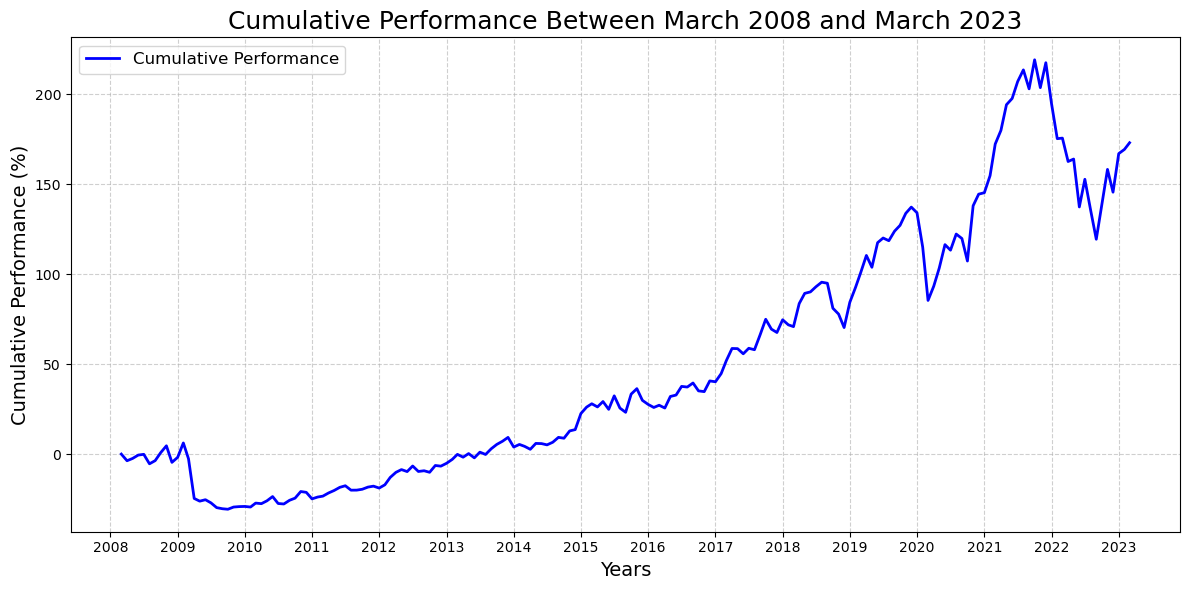

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'Month' data from 'results_df' to calculate cumulative performance
results_df['Month'] = pd.to_datetime(results_df['Month'])

# Calculate cumulative performance in percentage
results_df['Cumulative Performance (%)'] = ((results_df['Total Capital (€)'] / results_df['Total Capital (€)'].iloc[0]) - 1) * 100

# Add a column for years
results_df['Year'] = results_df['Month'].dt.year

# Plot the cumulative performance curve
plt.figure(figsize=(12, 6))
plt.plot(results_df['Month'], results_df['Cumulative Performance (%)'], label="Cumulative Performance", linewidth=2, color='blue')

# Adjust x-axis scale to display only years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))

# Add details to the plot
plt.title("Cumulative Performance Between March 2008 and March 2023", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Cumulative Performance (%)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()


### Comparison of Our Performance with That of Various Stock Market Indices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


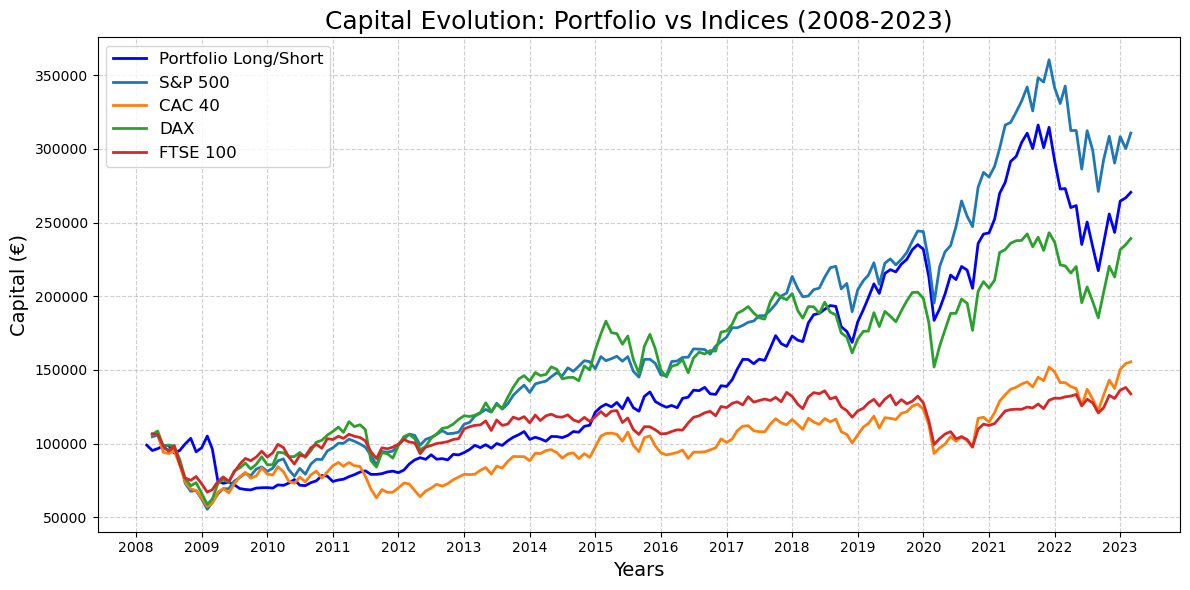

In [41]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Download data for indices from March 2008 to March 2023
indices = {
    "S&P 500": "^GSPC",
    "CAC 40": "^FCHI",
    "DAX": "^GDAXI",
    "FTSE 100": "^FTSE"
}

capital_initial = 100_000  
index_capitals = {}  


for name, ticker in indices.items():
    # Download the data from Yahoo Finance
    data = yf.download(ticker, start='2008-03-01', end='2023-03-31', interval='1mo')
    # Calculate monthly returns
    data['Monthly Return'] = data['Adj Close'].pct_change()
    # Calculate cumulative capital based on monthly returns
    index_capitals[name] = capital_initial * (1 + data['Monthly Return']).cumprod()

# Plot the portfolio and index capital curves
plt.figure(figsize=(12, 6))

# Plot portfolio curve
plt.plot(results_df['Month'], results_df['Total Capital (€)'], label="Portfolio Long/Short", linewidth=2, color='blue')

# Plot the index capital curves
for name, capital in index_capitals.items():
    plt.plot(capital.index, capital.values, label=name, linewidth=2)

# Add details to the plot
plt.title("Capital Evolution: Portfolio vs Indices (2008-2023)", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Capital (€)", fontsize=14)
# Format x-axis to show years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


### Comparison of Our Performance with That of the benchmark

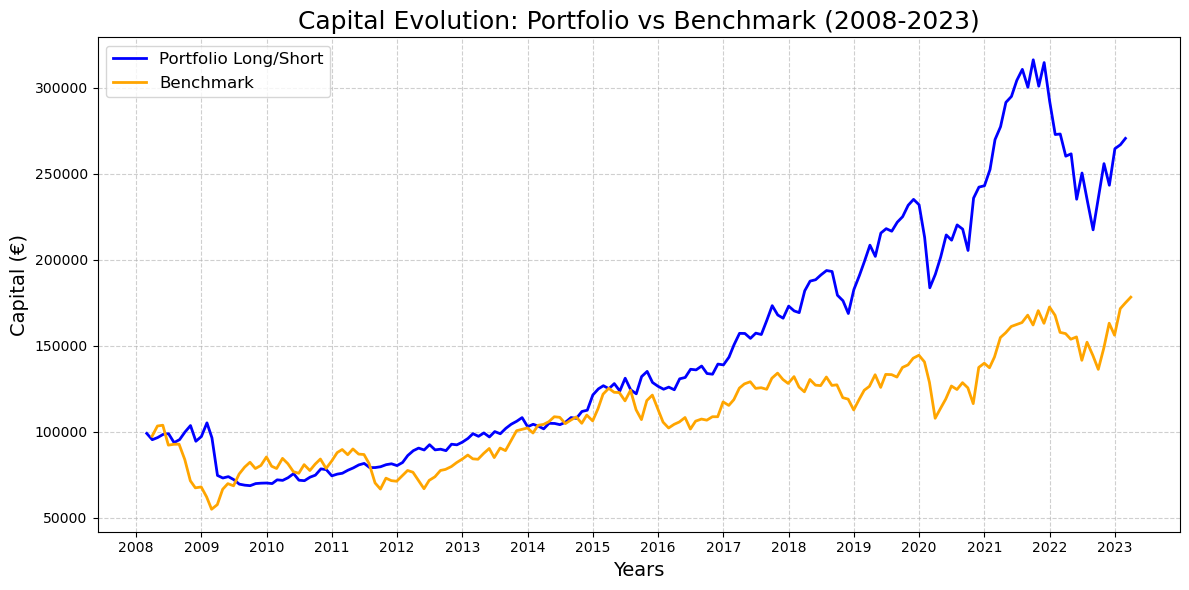

In [43]:
# Calculate the capital evolution for the benchmark
capital_initial = 100_000  
# Calculate the cumulative capital for the benchmark using its return data
benchmark_returns['Benchmark Capital (€)'] = capital_initial * (1 + benchmark_returns['ESTX 50 (EUR) NRt']).cumprod()

# Plot the portfolio and benchmark curves
plt.figure(figsize=(12, 6))

# Plot the strategy's capital evolution curve
plt.plot(results_df['Month'], results_df['Total Capital (€)'], label="Portfolio Long/Short", linewidth=2, color='blue')

# Plot the benchmark capital evolution curve
plt.plot(benchmark_returns['Date'], benchmark_returns['Benchmark Capital (€)'], label="Benchmark", linewidth=2, color='orange')

# Add details to the plot
plt.title("Capital Evolution: Portfolio vs Benchmark (2008-2023)", fontsize=18)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Capital (€)", fontsize=14)
# Format the x-axis to display years
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.YearLocator(1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()